# 1章 ニューラルネットワークの復習

## 1.1 数学とPythonの復習

### 1.1.1 ベクトルと行列

テンソル：ベクトルや行列を拡張させ，N次元数の集まりとみる．

In [4]:
# -*- coding:utf-8 -*-

import numpy as np

# ベクトルの定義
x = np.array([1, 2, 3])
print(x.__class__)  # クラスを表示

print(x.shape)   # 形状の確認
print(x.ndim)    # 次元数の確認

# 行列の定義
W = np.array([[1, 2, 3], [4, 5, 6]])
print(W.shape)  # 形状の確認
print(W.ndim)   # 次元数の確認

<class 'numpy.ndarray'>
(3,)
1
(2, 3)
2


### 1.1.2 行列の要素ごとの計算

要素ごとの計算をしてみる．
このとき，多次元配列中の要素の中で，-各要素が独立して- 演算が行われる．

In [6]:
W = np.array([[1, 2, 3], [4, 5, 6]])
X = np.array([[0, 1, 2], [3, 4, 5]])

print(W + X)
print(W * X)
print(W / X)  # divide by zero

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  2  6]
 [12 20 30]]
[[       inf 2.         1.5       ]
 [1.33333333 1.25       1.2       ]]


C:\Users\81804\AppData\Local\Temp/ipykernel_21104/1312443076.py:6: RuntimeWarning: divide by zero encountered in true_divide
  print(W / X)  # divide by zero


### 1.1.3 ブロードキャスト

ブロードキャスト：形状の異なる配列同士の演算を可能にする．NumPyの賢い機能．

In [7]:
# 2次元配列とスカラーの計算
A = np.array([[1, 2], [3, 4]])
print(A * 10)

# 1次元配列と2次元配列を計算する
A = np.array([[1, 2], [3, 4]])
b = np.array([10, 20])
print(A * b)

[[10 20]
 [30 40]]
[[10 40]
 [30 80]]


##### NumPyのブロードキャストが有効に働くには，多次元配列のいくつかのルールを満たす必要がある．

### 1.1.4 ベクトルの内積と行列の積

- ベクトルの内積：2つのベクトル間の対応する要素の積を足し合わせたもの．直観的には「2つのベクトルがどれだけ同じ方向を向いているか」を表すと考えられる．
- 行列の積：左側の行列の行ベクトル（横方向）と右側の行列の列ベクトル（縦方向）の内積（要素ごとの積と和）によって計算される．計算結果は新しい行列の対応する要素に格納される．

In [8]:
# ベクトルの積
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.dot(a, b))

# 行列の積
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print(np.dot(A, B))

32
[[19 22]
 [43 50]]


形状チェック：行列の積では，対応する次元の要素数を一致させる．

行列の積などの計算では，形状チェック- 行列の形状に注目し，その推移を見ていくことが- 重要．それによってニューラルネットワークの実装をスムーズに進めることができる．

## 1.2 ニューラルネットワークの推論

### 1.2.1 ニューラルネットワーク推論の全体図

全結合層：隣接するニューロン間のすべてに（矢印による）結びつきがあるニューラルネットワーク

隠れ層のニューロンは重みをニューロンの乗算にバイアスを加算した重み付き和で求めることができる．

重み付き和は行列の積でまとめて計算することができる．

ニューラルネットワークの分野では，複数のサンプルデータ（ミニバッチ）に対して，一斉に推論や学習を行う．それを行うために行列xの各行に，個別のサンプルデータを格納する．

In [13]:
# ミニバッチ版の全結合層による変換
import numpy as np
W1 = np.random.randn(2, 4)  # 重み
b1 = np.random.randn(4)     # バイアス
x = np.random.randn(10, 2)  # 入力
h = np.dot(x, W1) + b1
print(x)
print(h)  # shape(10, 4)のデータが格納されている

[[-0.41740709  1.12897949]
 [-0.01073021  0.71204722]
 [-0.96060348 -0.93625724]
 [ 0.16412077 -2.04854319]
 [-0.85810279  0.81632931]
 [-1.015187   -0.40560089]
 [-0.58159555  0.51073976]
 [-1.36675517  0.0946858 ]
 [ 1.92960725 -0.38318468]
 [ 1.74132828  0.05298426]]
[[-1.20691962 -0.10938825  0.7410933  -1.55563603]
 [-1.32946119 -0.80444209 -0.06819892 -0.78671374]
 [-2.44705248 -2.32451884  1.09915342  0.0299136 ]
 [-2.76411539 -4.19787774 -1.1278136   2.11582765]
 [-1.48339604 -0.27265537  1.40732606 -1.62720013]
 [-2.17646683 -1.66214575  1.33864659 -0.54625999]
 [-1.57855111 -0.7717412   0.85097764 -1.08236637]
 [-1.99565779 -0.89361762  2.07682845 -1.35033   ]
 [-1.43549142 -3.04887967 -3.6830143   1.99118478]
 [-1.2485874  -2.43560305 -3.24130376  1.39293943]]


上のコードにおいてはバイアスの計算においてブロードキャストが働いている．

全結合層による変換は「線形」な変換．これに「非線形」な効果を与えるのが，活性化関数．非線形な活性化関数を用いることで，ニューラルネットワークの表現力は増すことができる．

In [17]:
# sigmoid関数を実装
# sigmoid関数は，任意の実数を受け取り，0～1の間の実数を出力する

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 隠れ層のニューロンをsigmoid関数で変換する

a = sigmoid(h)
print(a)  # アクティベーション

[[0.23024654 0.47268017 0.67723488 0.17427374]
 [0.2092485  0.30907611 0.48295688 0.31287473]
 [0.07965436 0.08911258 0.75010145 0.50747784]
 [0.0592944  0.01480495 0.24456482 0.89243205]
 [0.18491502 0.43225532 0.80334385 0.16421428]
 [0.10188377 0.15947417 0.79226729 0.36673255]
 [0.17100078 0.31610257 0.70077218 0.25305846]
 [0.11965958 0.29036384 0.88863054 0.20581643]
 [0.1922445  0.04526587 0.0245302  0.87986843]
 [0.22294476 0.08049777 0.03764063 0.80106109]]


In [18]:
# ここまでの話をまとめた処理を実装

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.dot(x, W1) + b1
a = sigmoid(h)
s = np.dot(a, W2) + b2

In [20]:
print(s)

# softmax関数を用いると，スコアの値が確率に変換される．

[[ 2.84742578  1.0122926  -1.5386459 ]
 [ 1.84033582  0.30078804 -1.06474079]
 [ 1.73700448 -0.1368664  -0.85099286]
 [ 1.03904554 -0.71522833 -0.49051237]
 [ 2.92219957  0.46265745 -1.28582365]
 [ 2.73269102  1.03081556 -1.53346234]
 [ 2.66298935  0.767315   -1.39314517]
 [ 2.22147193  0.43765442 -1.17849409]
 [ 2.93030975  0.74054343 -1.41868277]
 [ 3.15075296  1.24109293 -1.7027028 ]]


In [27]:
# 出力の最大値を推論結果とする分類問題を作成

class_list = ["red", "blue", "yellow"]  # 3つのクラスに分類
# ndarrayをlistに変換
t = s.tolist()
# 結果を格納するリスト
result = []

# for文で各配列の最小値を取り出し，該当するクラスを出力としてresultに追加
for i in t:
    print(i)
    result_num = min(i)
    result.append(class_list[i.index(result_num)])
    
print(result)

[2.8474257804354237, 1.012292601590684, -1.538645896026586]
[1.840335819262029, 0.3007880369659264, -1.0647407880742514]
[1.7370044792996469, -0.13686639832591405, -0.8509928638847406]
[1.039045535620169, -0.7152283345043766, -0.49051237124569125]
[2.9221995696267253, 0.46265744851252066, -1.2858236501016425]
[2.732691019136998, 1.030815564616516, -1.5334623416887703]
[2.6629893546179946, 0.7673149974895943, -1.3931451676330011]
[2.221471931402277, 0.43765442207503175, -1.1784940874711873]
[2.9303097516381595, 0.7405434321808437, -1.4186827741560446]
[3.1507529607939735, 1.2410929305382943, -1.702702797584103]
['yellow', 'yellow', 'yellow', 'blue', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow']


### 1.2.2 レイヤとしてのクラス化と順伝播の実装

ニューラルネットワークで行う処理を「レイヤ」として実装する．
- Affineレイヤ：全結合層による変換
- Sigmoidレイヤ：シグモイド関数による変換

各レイヤはPythonのクラスとして実装する．メインとなる変換をforward()というメソッド名で実装する．

ニューラルネットワークの推論で行う処理は，ニューラルネットワークの順伝播に相当する．ニューラルネットワークでの学習の差異には，順伝播とは逆方向にデータ（勾配）を伝播する．これは逆伝播という．

##### ニューラルネットワークの実装ルールを設ける
- すべてのレイヤは，メソッドとしてforward()とbackward()を持つ
- すべてのレイヤは，インスタンス変数としてparamsとgradsを持つ

forward(),backward()：それぞれが順伝播と逆伝播に対応する.

paramsは重みやバイアスなどのパラメータをリストとして保持する．

gradsはparamsのパラメータに対応する形で，各パラメータの勾配をリストとして保持する．

In [1]:
# sigmoidレイヤを実装

import numpy as np

class Sigmoid:
    def __init__(self):
        # 学習するパラメータは存在しないのでparamsを空のリストで初期化
        self.params = []
        
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
# Affineレイヤを実装
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

Affineレイヤは，初期化時に重みとバイアスを受け取る．このとき，Affineレイヤのパラメータは，重みとバイアスになる（その2つのパラメータが，ニューラルネットワークの学習で随時更新）．この2つはインスタンス変数のparamsにリストとして保存される．

実装ルールに従うと，すべてのレイヤには学習すべきパラメータがインスタンス変数のparamsに必ず存在することになる．そのため，ニューラルネットワークのすべてのパラメータを簡単にまとめることができ，パラメータの更新作業やパラメータのファイルへの保存が容易になる．

In [12]:
# ニューラルネットワークの推論処理を実装する
# 流れはAffine→Sigmoid→Affine
# TwoLayerNetというクラスでメインの推論処理をpredict(x)というメソッドで実装

# TwoLayerNet
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 重みとバイアスの初期化
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        # レイヤの作成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        # すべての重みをリストにまとめる
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x    

In [18]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
print(s)  # 結果の出力
s.shape

[[ 0.64515508 -1.42253412  0.16079912]
 [-0.10862677 -2.73336097  1.69908848]
 [-0.04295792 -2.20195024  0.65467227]
 [-0.09217282 -2.00574843 -0.17149744]
 [ 0.56596568 -1.73494578  1.05524889]
 [ 0.06319005 -2.06098324  0.45045015]
 [ 0.27182784 -1.99515819  1.88272134]
 [ 0.04703186 -2.04102781  0.26824644]
 [ 0.23059266 -2.08385397  2.55353561]
 [ 0.05973775 -2.07720559  0.54786167]]


(10, 3)

In [24]:
# 学習すべきパラメータがリストにまとめられている．
ls = model.params
print(ls)
print(type(ls))
len(ls)  # 重みバイアス重みバイアスで4種類

[array([[-0.30125433, -0.1397623 ,  2.06150556, -0.60246427],
       [ 2.32813302,  0.98482191,  0.19927845,  0.13604085]]), array([-1.37381613,  1.8201828 , -0.97010266, -1.12441416]), array([[-0.46888568, -0.30072422,  2.02923588],
       [ 0.28741483, -0.25905885,  1.20321348],
       [ 1.36016433,  0.62307928,  0.74492336],
       [ 1.03460506, -0.95211515,  0.12803831]]), array([-0.66728962, -1.69731335, -0.99425519])]
<class 'list'>


4

## 1.3 ニューラルネットワークの学習

ニューラルネットワークは学習を行わなければよい推論ができない．最初に学習を行い，その学習されたパラメータを使って推論するのが一般的な流れである．推論は，他クラス分類などの問題に答えを出す作業であり，学習は，最適なパラメータを見つける作業である．

### 1.3.1 損失関数

多クラス分類を行うニューラルネットワークの場合，損失関数として交差エントロピー誤差を用いる場合が多くある．交差エントロピー誤差は，ニューラルネットワークが出力する各クラスの「確率」と「教師ラベル」から求められる．

##### 損失を求めるために，SoftmaxレイヤとCrossEntoropyErrorレイヤを追加する．

Softmax関数と交差エントロピー誤差を計算するレイヤをSoftmaxwithLossレイヤとして実装する．（まとめることで逆伝播の計算が簡単になるため）

### 1.3.2 微分と勾配

### 1.3.3 チェインルール

#### チェインルールの重要ポイント
私たちの扱う関数がどれだけ複雑だとしても，どれだけ複数の関数が連結したとしても，その微分は個別の関数の微分によって求めることができるということ．各関数の局所的な微分を計算できれば，その積によって最終的な全体の微分を求めることができる．


### 1.3.4 計算グラフ

計算グラフ：計算を視覚的に表すもの

- 乗算ノード
- 分岐ノード
- Repeatノード

In [36]:
# Repeatノード
import numpy as np
D, N = 8, 7
x = np.random.randn(1, D)  # 入力
y = np.repeat(x, N, axis=0)  # forward

dy = np.random.randn(N, D)  # 仮の勾配
dx = np.sum(dy, axis=0, keepdims=True)

dx.shape  # keepdims=Trueの場合は(1, D)

(1, 8)

- Sumノード(汎用的な加算ノード)

In [40]:
# Sumノード
import numpy as np
D, N = 8, 7
x = np.random.randn(N, D)
print(x.shape)
y = np.sum(x, axis=0, keepdims=True)  # forward

dy = np.random.randn(1, D)  # 仮の勾配
print(dy.shape)
dx = np.repeat(dy, N, axis=0)  # backward

(7, 8)
(1, 8)


SumノードとRepeatノードは，それぞれ逆の関係にある．Sumノードの順伝播がRepeatノードの逆伝播に相当し，Sumノードの逆伝播がRepeatノードの順伝播に相当する．

- MatMulノード

In [41]:
# MatMulノードをレイヤとして実装する
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
        
    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dw = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

### 1.3.5 勾配の導出と逆伝播の実装

- Sigmoidレイヤ

In [43]:
# Sigmoidレイヤ
# 順伝播の出力をインスタンス変数のoutに保持しておく．
# 逆伝播の際にout変数を使って計算を行う．

class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
    
    def forward(self, x):
        # Sigmoidを計算するだけ
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

- Affineレイヤ

バイアスの加算では，NumPyのブロードキャストが使われている．その点を明示的に記述して実装する必要がある．

In [44]:
# NumPyのブロードキャスト機能は，裏側でRepeatノードの計算が行われていると考える
# Affineレイヤの実装

class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np_zeros_like(W), np.zeros_like(b)]
        self.x = None
    
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout. W.T)
        dw = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

- Softmax with Lossレイヤ

#### ニューラルネットワークの学習における重要な性質
Softmaxレイヤから逆伝播は，Softmaxレイヤの出力と教師ラベルの差分になる．ニューラルネットワークの逆伝播ではこの差分（誤差）が前レイヤへ伝わっていく．

### 1.3.6 重みの更新

誤差逆伝播法によって勾配を求めることができたら，その勾配を使ってニューラルネットワークのパラメータを更新する．
- step1(ミニバッチ):訓練データの中からランダムに複数のデータを選び出す
- step2(勾配の算出):誤差逆伝播法により，各重みパラメータに関する損失関数の勾配を求める．
- step3(パラメータの更新):勾配を使って重みパラメータを更新する
- step4(繰り返す):step-1, step-2, step-3を必要な回数だけ繰り返す

#### 勾配降下法
まずはミニバッチでデータを選び，続いて誤差逆伝播法によって重みの勾配を得る．この勾配は，現時点での重みパラメータにおいて，損失を最も増やす方向を指す．そのため，パラメータをその購買の逆方向に更新することで，損失を下げる．この作業を必要な回数だけ繰り返す．
#### SGD(Stochastic Gradient Descent: 確率的勾配降下法)

In [45]:
# SGDの実装
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

初期化の引数であるlrはlearning rate（学習係数）を表す．学習係数をインスタンス変数として保持する．update(params, grads)というメソッドでパラメータの更新処理を行う．

## 1.4 ニューラルネットワークで問題を解く

### 1.4.1 スパイラル・データセット

In [48]:
import sys
sys.path.append('..')  # 親ディレクトリのファイルをインポートするための設定
from dataset import spiral

In [49]:
import matplotlib.pyplot as plt

# xが入力データ，tが教師ラベル
# データの読み込みを行う

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

Duplicate key in file WindowsPath('C:/Users/81804/anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family:  sans-serif')


x (300, 2)
t (300, 3)


### 1.4.2 ニューラルネットワークの実装

In [51]:
# ニューラルネットワークを実装
import sys
sys.path.append('..')
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

In [53]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 重みとバイアスの初期化
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # レイヤの生成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # すべての重みと勾配をリストにまとめる
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
        
    # 3つのメソッドを実装
    
    # 推論を行うpredict()
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    # 順伝播を行うforward()
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    # 逆伝播を行うbackward()
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

ここでの実装がすっきりとしているのは，これまでにニューラルネットワークで使用する処理ブロックをレイヤとして実装してきたことが功を奏している．forward, backwardを適切な順番で呼び出すだけでいい．

### 1.4.3 学習用のソースコード

学習データを読み込み，ニューラルネットワーク（モデル）とオプティマイザを生成する．先に示した学習の4ステップの手順に従って学習を行う．機械学習の分野では，問題のために設計した手法（ニューラルネットワークやSVMなど）を指して「モデル」と呼ぶことが一般的である．

In [60]:
# 学習用のコードを示す
import sys
sys.path.append('..')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt

# ❶ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# ②データの読み込み，モデルとオプティマイザの生成
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学習で使用する変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # ③データのシャッフル
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # ④勾配を求め，パラメータを更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # ⑤定期的に学習経過を出力
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epoch %d | iter %d / %d | loss %.2f'
                 % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| epoch 1 | iter 10 / 10 | loss 1.13
| epoch 2 | iter 10 / 10 | loss 1.13
| epoch 3 | iter 10 / 10 | loss 1.12
| epoch 4 | iter 10 / 10 | loss 1.12
| epoch 5 | iter 10 / 10 | loss 1.11
| epoch 6 | iter 10 / 10 | loss 1.14
| epoch 7 | iter 10 / 10 | loss 1.16
| epoch 8 | iter 10 / 10 | loss 1.11
| epoch 9 | iter 10 / 10 | loss 1.12
| epoch 10 | iter 10 / 10 | loss 1.13
| epoch 11 | iter 10 / 10 | loss 1.12
| epoch 12 | iter 10 / 10 | loss 1.11
| epoch 13 | iter 10 / 10 | loss 1.09
| epoch 14 | iter 10 / 10 | loss 1.08
| epoch 15 | iter 10 / 10 | loss 1.04
| epoch 16 | iter 10 / 10 | loss 1.03
| epoch 17 | iter 10 / 10 | loss 0.96
| epoch 18 | iter 10 / 10 | loss 0.92
| epoch 19 | iter 10 / 10 | loss 0.92
| epoch 20 | iter 10 / 10 | loss 0.87
| epoch 21 | iter 10 / 10 | loss 0.85
| epoch 22 | iter 10 / 10 | loss 0.82
| epoch 23 | iter 10 / 10 | loss 0.79
| epoch 24 | iter 10 / 10 | loss 0.78
| epoch 25 | iter 10 / 10 | loss 0.82
| epoch 26 | iter 10 / 10 | loss 0.78
| epoch 27 | iter 10 

| epoch 286 | iter 10 / 10 | loss 0.11
| epoch 287 | iter 10 / 10 | loss 0.11
| epoch 288 | iter 10 / 10 | loss 0.12
| epoch 289 | iter 10 / 10 | loss 0.11
| epoch 290 | iter 10 / 10 | loss 0.11
| epoch 291 | iter 10 / 10 | loss 0.11
| epoch 292 | iter 10 / 10 | loss 0.11
| epoch 293 | iter 10 / 10 | loss 0.11
| epoch 294 | iter 10 / 10 | loss 0.11
| epoch 295 | iter 10 / 10 | loss 0.12
| epoch 296 | iter 10 / 10 | loss 0.11
| epoch 297 | iter 10 / 10 | loss 0.12
| epoch 298 | iter 10 / 10 | loss 0.11
| epoch 299 | iter 10 / 10 | loss 0.11
| epoch 300 | iter 10 / 10 | loss 0.11


#### エポック（epoch）
学習の単位を表す．1エポックは学習データをすべて見たとき，データセットを一蹴したときに相当する．ここでは300エポックの学習を行う．

#### 決定境界
学習後のニューラルネットワークの分離領域

##### 学習後のニューラルネットワークは「渦巻」のパターンを正しくとらえた．非線形や分離領域を学習することができた．ニューラルネットワークは隠れ層を持つことで複雑な表現が可能になる．さらに層を重ねれば，その表現力がより豊かになるのがディープラーニングの特徴．

### 1.4.4 Trainerクラス

今後，ニューラルネットワークの学習を実行する機会が多くある．学習用のコードを毎回同じように実装するのは退屈なので，学習を行うクラスをTrainerクラスとして提供する．

###### Trainerクラスはcommon/trainer.pyにあるので適宜参照．

このクラスのイニシャライザは，ニューラルネットワーク（モデル）とオプティマイザを受け取る．

学習を開始する際にはfit()メソッドを読んで学習を開始する．

#### fit()メソッドの引数
- x: 入力データ
- t: 教師ラベル
- max_epoch(=10): 学習を行うエポック数
- batch_size(=32): ミニバッチのサイズ
- eval_interval(=20): 結果（平均損失など）を表示するインターバル．例えばeval_interval=20と設定すると，20イテレーションごとに損失の平均を求め，その結果を画面に出力する．
- max_grad(=None): 勾配の最大ノルム．勾配のノルムがこの値を超えた場合，勾配を小さくする．（勾配クリッピング）

Trainerクラスにはplot()というメソッドがあるので，fit()メソッドで開始し，eval_intervalのタイミングで評価された平均損失をプロットする．

| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 1.13
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.16
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 1.09
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 1.08
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 1.04
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 1.03
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.94
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 2

| epoch 192 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 193 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 194 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 195 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 196 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 197 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 198 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 199 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 200 |  iter 1 / 10 | time 0[s] | loss 0.14
| epoch 201 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 202 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 203 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 204 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 205 |  iter 1 / 10 | time 0[s] | loss 0.14
| epoch 206 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 207 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 208 |  iter 1 / 10 | time 0[s] | loss 0.14
| epoch 209 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 210 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 211 |  iter 1 / 10 | ti

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


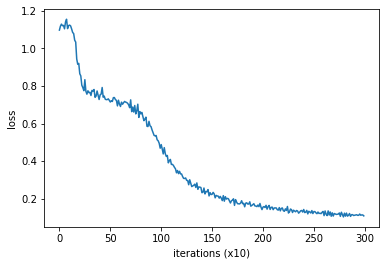

In [62]:
# Trainerクラスを使って学習を行うコード

import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
oprimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

以前と同じようにニューラルネットワークの学習が行われた．以前に示した学習用コードをTrainerクラスに担わせることで，コードがすっきりした．今後はTrainerクラスを使って学習を行う．

## 1.5 計算の高速化

ニューラルネットワークをいかに高速に計算するかということは重要なテーマにになる．ここではニューラルネットワークの高速化に有効な
- ビット精度
- GPU

について説明する．

### 1.5.1 ビット精度

In [63]:
# 64ビット浮動小数点数が使われているか調べる
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

ニューラルネットワークの推論及び学習は，32ビットの浮動小数点数で問題なく，認識精度を落とすことなく，行えることが知られている．

In [67]:
# NumPyで32ビット浮動小数点を優先して利用する
# 2通りの指定で確認
b = np.random.randn(3).astype(np.float32)
print(b.dtype)

c = np.random.randn(3).astype('f')
print(c.dtype)

float32
float32


NumPyは16ビットの浮動小数点数が用意されるが，一般的なCPUやGPUでは演算が32ビットで行われるため，処理速度の向上は見込めない．一方，学習した重みを（外部ファイル）に保存するようなケースでは容量を半分しか食わずに済むので有効．

今後は，学習した重みを保存するときに限り，16ビットの浮動小数点数に変換することにする．

ディープラーニングの注目に沿って，最近のGPUでは16ビットの半精度浮動小数点数がストレージと演算の両方でサポートされている．GoogleのTPUと呼ばれる独自チップは8ビットで計算できるように工夫されている．

### 1.5.2 GPU(CuPy)

大量の積和演算の多くは並列計算が可能であり，CPUよりもGPUの方が適している．一般的なディープラーニングのフレームワークでは，CPUに加えてGPUでも実行できるように設計されている．

CuPy（Pythonライブラリ）を使用する．CuPyを利用するには，NVIDIA製のGPUを備えたマシンが必要．また，CUDAと呼ばれるGPU向けの汎用並列コンピューティング・プラットフォームをインストールする必要がある．

CuPyはNumPyと共通のAPIを持つので，基本的に同じ使い方ができる．

#### GPUを自分のPCで使いたい
GPU計算を行うためにCupyを使おうとしたが、GPUについていろいろ調べたところ、PCに搭載されているGPUがIntel製のもので、NVIDIA製のものではなく環境構築がうまくいかなかった。とりあえず現時点ではGPU実装は見送り、改めて自分のPCにGPU環境を構築するための調べ物をすることにする

## 1.6 まとめ

#### 本章で学んだこと
- ニューラルネットワークは、入力層、隠れ層、出力層を持つ
- 全結合層によって線形な変換が行われ、活性化関数によって非線形な変換が行われる
- 全結合像やミニバッチ処理は、行列としてまとめて計算することができる
- 誤差逆伝播法を使って効率的にニューラルネットワークの損失に関する勾配を求めることができる
- ニューラルネットワークで行う処理は，計算グラフによって可視化することができ，順伝播や逆伝播の理解に役立つ
- ニューラルネットワークの実装では，構成要素を「レイヤ」としてモジュール化することで，組み立てが容易になる
- ニューラルネットワークの高速化において，データのビット精度とGPUによる並列計算が重要である